In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from statistics import mean
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Part 1

## Generate some random numbers

In [2]:
# We can use "range" to give us an array of numbers.
# Here we generate the integers between 1 an 15.
# Notice that the second number has to be one more than the last number we want to generate, because somehow Python thinks that's ok.

r = range(1,16)
list(r)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [3]:
# The built-in module called random can be used in lots of ways to get random stuff.
# Here, we use it to pick (sample) five numbers out of our array of numbers

random.sample(range(1,15), 5)


[3, 9, 13, 4, 1]

# The normal distribution

- observed often in nature
- From wikipedia: "Therefore, physical quantities that are expected to be the sum of many independent processes [...] often have distributions that are nearly normal."




## Generating the normal distribution from coin-flipping

We can test this using coin-flipping. Imagine a group of N people lined up in a row in the middle of a football pitch. We'll call this point zero. They all flip a coin. If they get heads, they take one step forward. If they get tails, they take one step back. Then, they flip the coin again, and repeat the procedure. (example stolen from ["Statistical Rethinking" by Richard McElreath](https://www.youtube.com/channel/UCNJK6_DZvcMqNSzQdEkzvzA))

Let's put them in their starting positions...

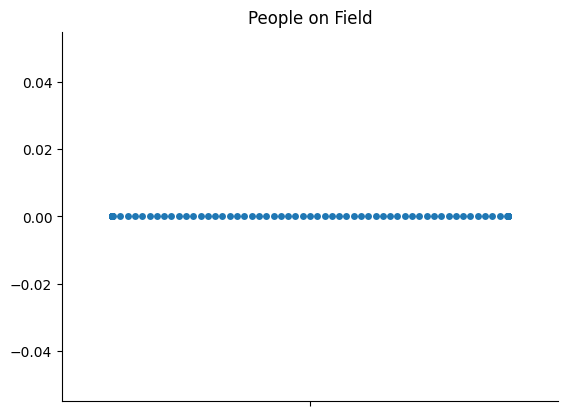

In [6]:
# number of people on the field
n = 100

# start them all at the center line
positions = np.asarray([0]*n)

# define a function to move them one step to the right or to the left based on virutal coin flip
def coin_flip(n):
    heads = [random.uniform(0,1) for i in range(n)]         # generate a random number between 0 and 1
    move = [1 if i > 0.5 else -1 for i in heads]            # if the number is over 0.5, count that as "heads", otherwise count it as "tails"
    return move                                             # output the result (either 1 or -1)

# plot the current position on the field
ax = sns.swarmplot(positions) 
ax.set_title("People on Field")


sns.despine()

## Move them one flip at a time..

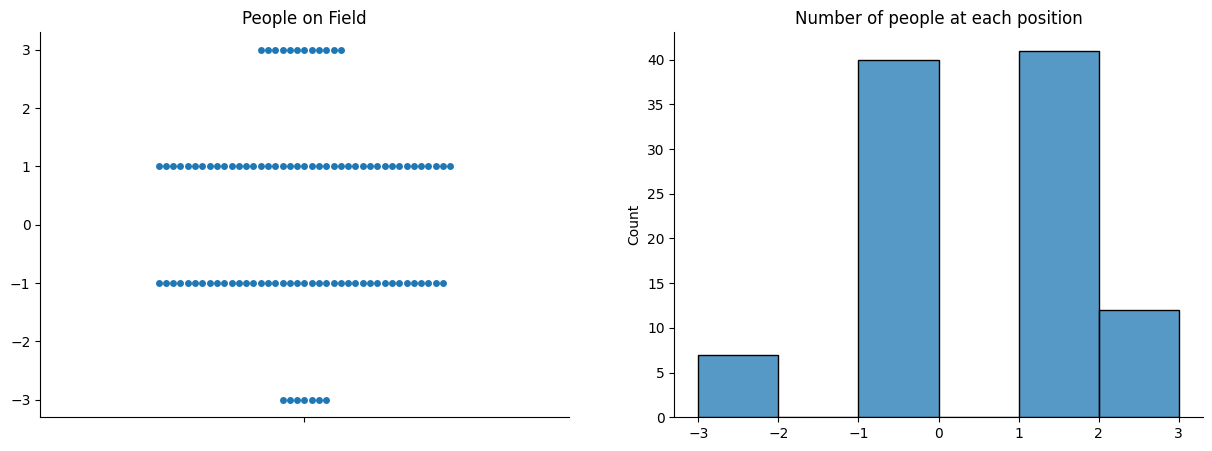

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))             # create a figure with two subplots

positions = positions + coin_flip(n)                        # let each person flip their coin, and move one step forward or one step back

ax1 = sns.swarmplot(positions, ax = axes[0])                # on the left, plot the current position of each person on the field
ax2 = sns.histplot(positions, binwidth = 1, ax = axes[1])                 # on the right, plot a histogram of the number of people at each position


#ax2.bar_label(ax2.containers[1])

axes[0].set_title("People on Field")
axes[1].set_title("Number of people at each position")


sns.despine()

## Move them many steps at a time

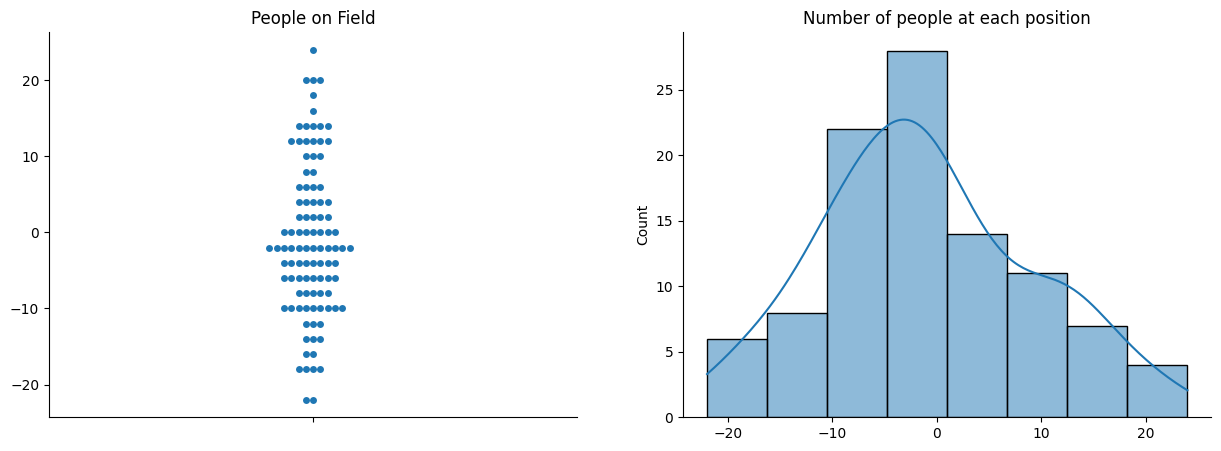

In [10]:
# approximate a normal distribution
n = 100
n_flips = 100

positions = np.asarray([0]*n)

for i in range(n_flips):
    positions = positions + coin_flip(n)



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1 = sns.swarmplot(positions, ax = axes[0])
ax2 = sns.histplot(positions, ax = axes[1], kde = True)
axes[0].set_title("People on Field")
axes[1].set_title("Number of people at each position")

sns.despine()

"Whatever the average value of the source distribution, each sample from it can be thought of as a fluctuation from that average value. When we begin to add these fluctuations together, they also begin to cancel one another out. A large positive fluctuation will cancel out a loarge negative one. The more terms in the sum, the more chances for each fluctuation to be canceled by another, or by a series of smaller ones in the opposite direction. So eventually the most likely sum, in the sense that there are the most ways to realize it, will be a sum in which every fluctuation is canceled by another, a sum of zero (relative to the mean)." 

McElreath, _Statistical Rethinking_, pg. 73-74.

## "The" normal distribution

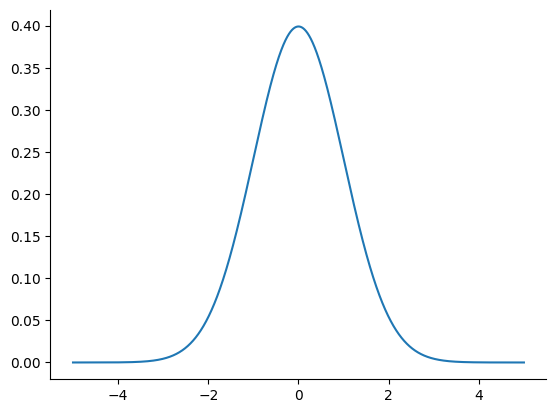

In [33]:
#make an x-axis for the plot, with numbers from 0 and 100 with steps of .001
x = np.arange(-5, 5, 0.001)     # numpy.arrange returns evenly spaced values within a given interval

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 0, 1))  # plot the probabiliy density function of the continous variable x
sns.despine()

# Part 2

## Sample from a normal distribution

Now, intead of building our own normal distributions by hand, we will get Python to take samples from a normal distribution

np.random.normal(loc, scale, size)

- loc: Mean of the distribution. Default is 0.
- scale: Standard deviation of the distribution. Default is 1.
- size: Sample size.


In [ ]:

nums = np.random.normal(loc = 5, scale = 2, size=10)
nums

## Sample some random numbers from a normal distribution, and plot them

Below, there is code to sample from a normal distribution based on three variables, mean, standard deviation (sd), and sample size (n). 

1. **Try holding the mean and stardard deviation constant, and change the sample size. What happens to the distribution of sampled data?**\
The higher the sample size, the closer the distribution resembles a normal distribution. Furthermore the x-axis  
2. **Now try keeping the mean and sample size constant, and try some different values for the standard deviation. What happens?**\ 
The larger the sd the more varied/spread out the distribution becomes. The standard deviation is also referred to as the *standard error*, so the lower the number the lower the margin for error allowed (???)

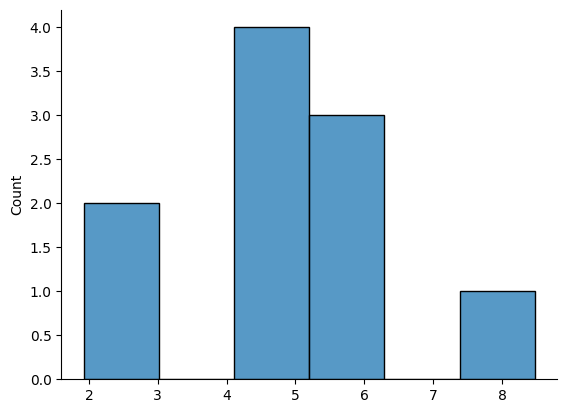

In [36]:

mean = 5
sd = 2
n = 1000 # sample size 
nums = np.random.normal(loc = mean, scale = sd, size = n)
ax = sns.histplot(nums)
#ax.set_xlim(-10,20)


sns.despine()

## Visualize the mean and the standard deviation

Now, add a line to plot showing where the mean and the standard deviations are. The black line in the middle is the mean, and the dotted lines show one standard deviation on either side of the mean.

Do the same exercise as above, holding the mean constant and changing the sample size and standard deviations, one at a time. What do you observe? What effect does changing the sample size have? What effect does changing the standard deviation have?

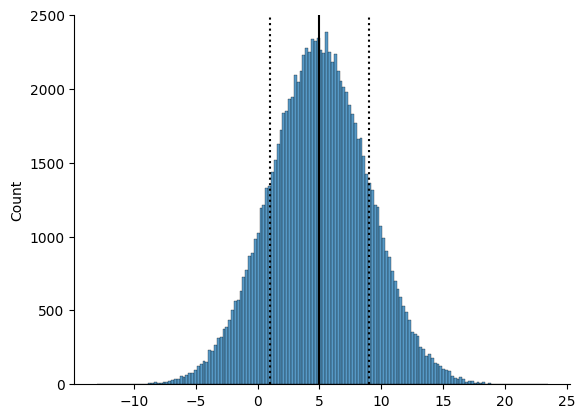

In [34]:
mean = 5                                                            # set the true population mean
sd = 4                                                              # set the true population variation
n = 100000                                                          # set the number of people (or whatever) in the sample
nums = np.random.normal(loc = mean, scale = sd, size = n)           # sample from the normal distribution with the parameters you have defined
ax = sns.histplot(nums)                                              
plt.axvline(x = mean, color = 'black')
plt.axvline(x = mean - sd, color = 'black', linestyle = 'dotted')
plt.axvline(x = mean + sd, color = 'black', linestyle = 'dotted')

sns.despine()

# Part 3

## Two normal distributions with different means

Now let's sample from two normal distributions with different means, but the same sample size and standard deviation.

1. **Keep mean 1 constant, and try changing mean 2. What do you observe? How much do you need to change mean 2 before there is no overlap between the distributions?**\
The further the means are from eachother the less they overlap, the mean2 needs to be 19 (when mean1 is 5) in order not to overlap.
2. **Set mean 1 to 5 and mean 2 to 9. Now try changing the standard deviation. How much do you need to change it before the distributions no longer overlap?**\ 
sd needs to be at 0.5 in order for the two distributions not to overlap. The larger the sd the more they overlap. 

3. **What does this tell us about the way t-tests work?**\
That the variables affect each other, this makes sense since a $t= \frac{mean1-mean2}{SE/}\
effect size = the difference between the two means

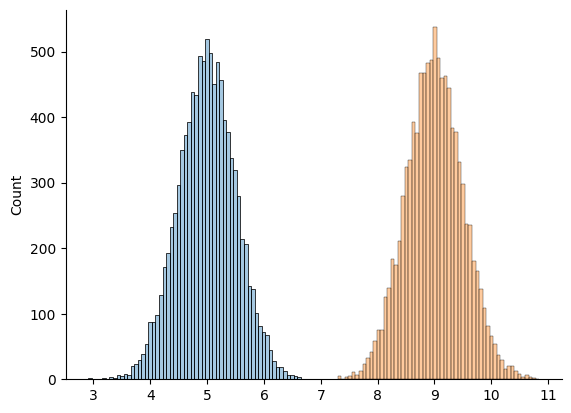

In [4]:
mean1 = 5
mean2 = 9

sd = 0.5
n = 10000
nums1 = np.random.normal(loc = mean1, scale = sd, size = n)

nums2 = np.random.normal(loc = mean2, scale = sd, size = n)

sns.histplot(nums1, alpha  = 0.4)
sns.histplot(nums2, alpha  = 0.4)

#plt.axvline(x = mean1, color = 'black')
#plt.axvline(x = mean2, color = 'black')

sns.despine()

Now try modifying the means, standard deviations, and sample size of both distributions. Try some extreme values. What do you observe?

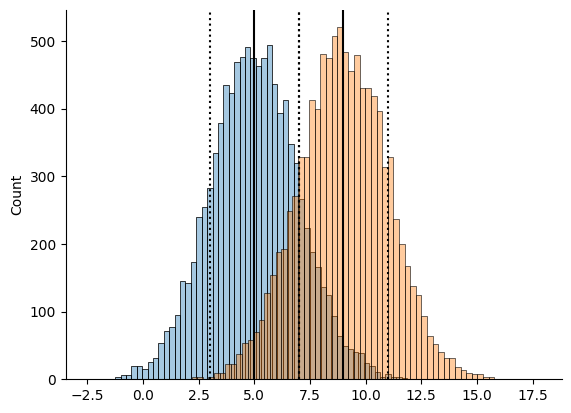

In [5]:
mean1 = 5
mean2 = 9

sd1 = 2
sd2 = 2

n1 = 10000
n2 = 10000

nums1 = np.random.normal(loc = mean1, scale = sd1, size = n1)

nums2 = np.random.normal(loc = mean2, scale = sd2, size = n2)

sns.histplot(nums1, alpha  = 0.4)
sns.histplot(nums2, alpha  = 0.4)


plt.axvline(x = mean1, color = 'black')                                 # adds a black line for the mean of distribution 1
plt.axvline(x = mean1 - sd1, color = 'black', linestyle = 'dotted')     # adds a dotted line for the lower bound of the SD for distribution 1
plt.axvline(x = mean1 + sd1, color = 'black', linestyle = 'dotted')     # adds a dotted line for the upper bound of the SD for distribution 1

plt.axvline(x = mean2, color = 'black')                                 # adds a black line for the mean of distribution 2
plt.axvline(x = mean2 - sd2, color = 'black', linestyle = 'dotted')     # adds a dotted line for the lower bound of the SD for distribution 2
plt.axvline(x = mean2 + sd2, color = 'black', linestyle = 'dotted')     # adds a dotted line for the upper bound of the SD for distribution 2


sns.despine()

# Part 4

# Two groups from one sample

Now take one single sample from a normal distribution, and divide it into two groups and plot the distributions of the two halves of the sample on top of each other. 

1. Inspect the means for each of the overlapping histograms.
2. Check the difference between the two means
3. Try changing the size of the sample (n). What do you observe?

In [ ]:
mean = 5
sd = 7
n = 10
nums = np.random.normal(loc = mean, scale = sd, size = n)

# split the sample into two groups

Group1 = np.array_split(nums, 2)[0]
Group2 = np.array_split(nums, 2)[1]

sns.histplot(Group1, alpha  = 0.4)
sns.histplot(Group2, alpha  = 0.4)


plt.axvline(x = Group1.mean(), color = 'green')
plt.axvline(x = Group2.mean(), color = 'green')

sns.despine()

print('Difference between mean 1 and mean 2:', abs(Group1.mean() - Group2.mean()))

# Part 5

# Simulate Type 1 Errors (false positives)

The code below performs the following steps for `number_of_experiments` many experiments:

- Samples from a normal distribution
- Divides the sample into 2 groups (insures that the null hypothesis is true)
- Does an independent-samples t-test on the two groups
- Plots the distribution of p-values
- Plots the distribution of "significant" p-values
- Compares the number of significiant p-values to the alpha level (0.05)

1. **Run the code. What do you observe when you inspect the output?**\
The amount of type I errors are larger than the level we allow it to be
2. **Try changing the alpha ("significance") level. What do you observe?**\
The smaller: the less type I rerrors + the fewer significant p-values
The larger: the more significant p-values but the more type I errors

5% of the total number of experiments: 50
Number of experiments with a false positive: 55


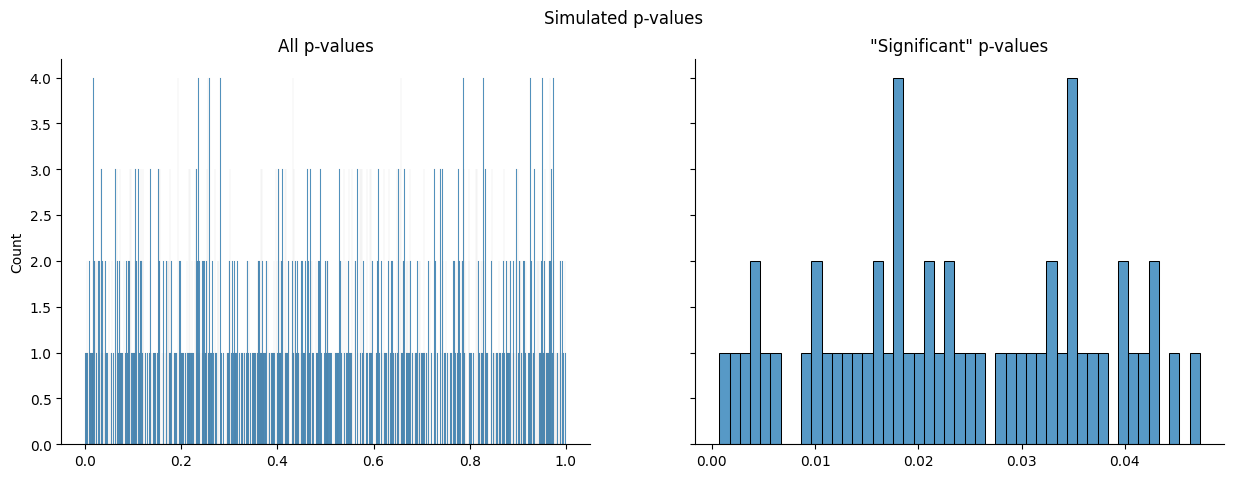

In [13]:
# Experiment parameters
mean = 5
sd = 7
n = 100
alpha = 0.05

# Repeat the same experiment many times with the same paramters
number_of_experiments = 1000

ps = []
for i in range(number_of_experiments):
        
        nums = np.random.normal(loc = mean, scale = sd, size = n)

        Group1 = np.array_split(nums, 2)[0]
        Group2 = np.array_split(nums, 2)[1]
        res = pg.ttest(Group1,Group2)
        ps.append(res['p-val'][0])
ps = [x for x in ps if x != 'p-val']
sig = [x for x in ps if x < alpha]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
fig.suptitle('Simulated p-values')

sns.histplot(ps, binwidth = 0.001, ax = axes[0])
sns.histplot(sig, binwidth = 0.001, ax = axes[1])

axes[0].set_title('All p-values')
axes[1].set_title('\"Significant\" p-values')

sns.despine()

print(str(int(alpha*100))+ '% of the total number of experiments:',int(len(ps)*alpha))
print('Number of experiments with a false positive:', len(sig))


## Distribution of false positives (type 1 errors)

The code below:

1. draws ``n`` samples from a normal distribution
2. divides the samples into two groups (that is, _insures that the null-hypothesis is true_)
3. runs an independent samples t-test and computes the p-value
4. repeats  this process for the number of times specified in the ``experiments`` variable
5. stores all of the p-values from all of the experiments
6. calculates the percent of p-values that are smaller than our chosen ``alpha``, that is, false positives
7. repeats this procedure the number of times specified in ``runs``
8. plots a histogram of the percentage of false positives produced by ``runs`` number of ``experiments`` t-tests
    
Questions:
1. What does the figure tell you?
2. What happens if you change ``alpha`` (the "signficance level")?

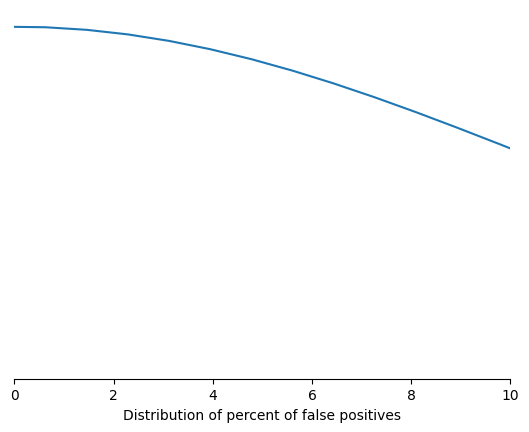

In [18]:
# Experiment parameters
mean = 5
sd = 2
n = 100
alpha = 0.05

# Simulate many runs of many experiments
runs = 100
experiments = 1

false_ps = []
for i in range(runs):
    ps = []
    for j in range(experiments):

            nums = np.random.normal(loc = mean, scale = sd, size = n)

            Group1 = np.array_split(nums, 2)[0]
            Group2 = np.array_split(nums, 2)[1]
            res = pg.ttest(Group1,Group2)
            ps.append(res['p-val'][0])
    ps = [x for x in ps if x != 'p-val']
    sig = [x for x in ps if x < alpha]
    false_ps.append((len(sig)/experiments) * 100)

#false_ps = [x/len(false_ps)*100 for x in false_ps]

ax = sns.kdeplot(false_ps)
ax.get_yaxis().set_visible(False)
ax.set_xlabel('Distribution of percent of false positives')
ax.set_xlim(0, 10)

sns.despine(left=True)